### Este notebook exemplo utiliza [markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) para formatação do texto, e [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Mathematics) para criação de fórmulas matemáticas.

Suponhamos que uma professora redesenhe seu curso de história para que os alunos façam testes frequentes antes de fazer os exames.

- Nota média histórica para todos os alunos antes de exames frequentes ($\mu = 75, \sigma = 10$);

- Depois de um semestre usando esses questionários, a nota média no exame final dos 25 alunos do seu curso foi $\bar{x} = 80$.

Determinar se a amostra de alunos que respondem aos testes frequentes teve pontuação "significativamente" melhor do que a dos alunos anteriores.

**1** - Estabelecer as hipóóteses nula e alternativa:

$H_0: \mu_{quiz} = 75;$

$H_a: \mu_{quiz} > 75.$

**2** - Definir a forma da região crítica, com base na hipótese alternativa.

$RC = \{ z \in R \mid z > z_c\}$

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

Z = stats.norm(0,1)

zs = np.arange(1.63, 1.69, 0.01)
bodies = [round(Z.cdf(x), 4) for x in zs]
tails = [1-x for x in bodies]

df = pd.DataFrame(zip(zs, bodies, tails), columns=['z', 'Corpo', 'Cauda'])

color = (df.Cauda == df.loc[2,'Cauda']).map({True: 'background-color: yellow', False: ''})

df.style.apply(lambda s: color)

,z,Corpo,Cauda
0,1.630000,0.948400,0.051600
1,1.640000,0.949500,0.050500
2,1.650000,0.950500,0.049500
3,1.660000,0.951500,0.048500
4,1.670000,0.952500,0.047500
5,1.680000,0.953500,0.046500
6,1.690000,0.954500,0.045500


Text(0.5, 1.0, 'Distribuição Z com área acima de 1.65 destacada.')

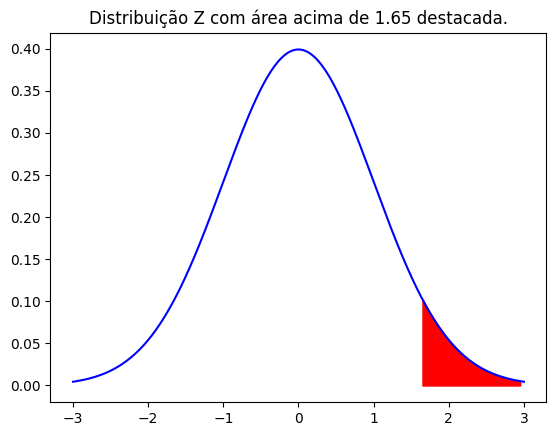

In [2]:
# simular valores dentro da distribuição normal N(0,1)
import matplotlib.pyplot as plt

x=np.linspace(0-3*1, 0+3*1,1000)

plt.plot(x, Z.pdf(x), color='b')

zc = 1.65

px=np.arange(zc,0+3*1,0.1)
plt.fill_between(px, Z.pdf(px),color='r')
plt.title('Distribuição Z com área acima de 1.65 destacada.')

**3** - Identificar a distribuição do estimador e obter sua estimativa.

_a. Calcule o desvio observado entre a média amostral e a média da população_
Encontre o desvio entre a média amostral e a média populacional.

$\bar{x} - \mu = 80 - 75 = 5$

_b. Calcule o desvio esperado devido ao erro de amostragem_
Calcule a quantidade esperada de erro amostral dado o tamanho da amostra.
                                        
$SEM_p = \frac{\sigma}{\sqrt{N}} = \frac{10}{\sqrt{25}} = 2$

Neste caso, o erro padrão da média é 2. Isso significa que quando N = 25, a distância típica que todas s médias amostrais possíveis estão da média populacional é 2. Esta é a quantidade de desvio que esperamos entre qualquer média amostral e a média da população devido ao erro amostral (ou seja, a diferença esperada pelo acaso).

_c. Calcule o z para uma média amostral_
Calcule o escore z obtido associado à média amostral obtida.

$z = \frac{(\bar{x} - \mu)}{SEM_p} = 2.5$

**4** - Fixar o $\alpha$ e obter a região críítica.


$P(Z > z_c) = 0.05$

In [ ]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
from scipy import stats
Z = stats.norm(0,1)
print("Zc:", Z.ppf(0.95))

Zc: 1.6448536269514722


**5** - Concluir o teste com base na estimativa e na região crítica.

$z_{obs} \in RC$

### Importante: o p-valor muito provavelmente não é igual a zero, esse valor geralemente é obtido quando a biblioteca tem uma limitação na aproximação de valores muito pequenos. É comum, em caso de não ter acesso a métodos de cálculo preciso, reportar $p-valor < 0.001$, por exemplo.

In [3]:
print('pvalue=', 1-Z.cdf(2.5))

pvalue= 0.006209665325776159


**Reproduzir o gráfico de densidade normal com função normal**

In [5]:
import numpy as np

def normal_density(x, mu, sigma):
    y = (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-0.5*((x-mu)/sigma)**2)
    return y

In [4]:
x = np.linspace(-3, 3, 1000)

In [6]:
normal_density(x, 0, 1)

array([0.00443185, 0.00451234, 0.00459414, 0.00467724, 0.00476168,
       0.00484747, 0.00493462, 0.00502316, 0.0051131 , 0.00520447,
       0.00529728, 0.00539155, 0.0054873 , 0.00558454, 0.00568331,
       0.00578361, 0.00588548, 0.00598892, 0.00609396, 0.00620061,
       0.00630891, 0.00641886, 0.0065305 , 0.00664384, 0.0067589 ,
       0.00687571, 0.00699428, 0.00711464, 0.00723681, 0.00736082,
       0.00748668, 0.00761441, 0.00774405, 0.00787561, 0.00800911,
       0.00814458, 0.00828205, 0.00842153, 0.00856306, 0.00870665,
       0.00885232, 0.00900011, 0.00915004, 0.00930212, 0.0094564 ,
       0.00961289, 0.00977161, 0.0099326 , 0.01009587, 0.01026146,
       0.01042939, 0.01059968, 0.01077237, 0.01094747, 0.01112502,
       0.01130504, 0.01148756, 0.0116726 , 0.0118602 , 0.01205038,
       0.01224317, 0.01243859, 0.01263667, 0.01283745, 0.01304095,
       0.01324719, 0.01345621, 0.01366804, 0.0138827 , 0.01410022,
       0.01432063, 0.01454397, 0.01477025, 0.01499952, 0.01523

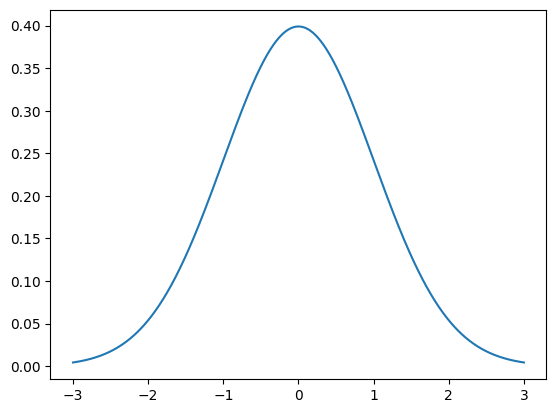

In [7]:
import matplotlib.pyplot as plt

plt.plot(x, normal_density(x, 0, 1))